--2020-03-09 18:44:26--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.3’

root_v6.13.08.Linux 100%[===================>] 131.05M  26.0MB/s    in 5.8s    

2020-03-09 18:44:33 (22.5 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.3’ saved [137415272/137415272]



Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


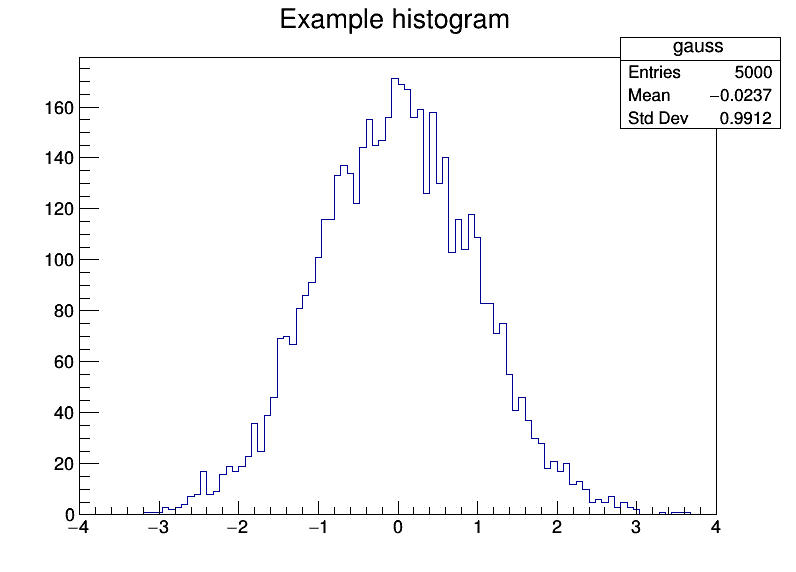

In [127]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()



In [128]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

--2020-03-09 18:44:39--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.28.138, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.4’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  15.2MB/s    in 29s     

2020-03-09 18:45:08 (14.9 MB/s) - ‘B2HHH_MagnetUp.root.4’ saved [444723234/444723234]



<CDLL '/content/APPS/root/lib/libGraf3d.so', handle 55c5b54dca00 at 7ff14668d410>

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


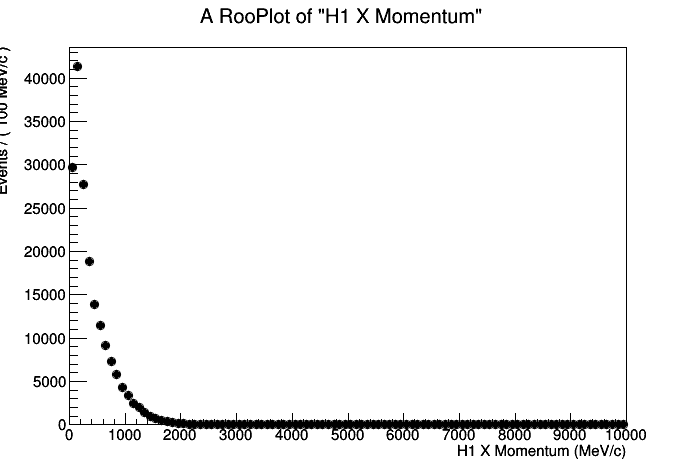

In [129]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

In [130]:
#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:

#Hint: I suggest we define a function which we might want to use later - something like:

import numpy as np


def p_tot_daughter(daughter):
  p_tot="(("+daughter+"_PX)**2+("+daughter+"_Py)**2+("+daughter+"_PZ)**2)**(1/2)"
  return p_tot

h1_ptot = p_tot_daughter("H1")
print(h1_ptot)


((H1_PX)**2+(H1_Py)**2+(H1_PZ)**2)**(1/2)


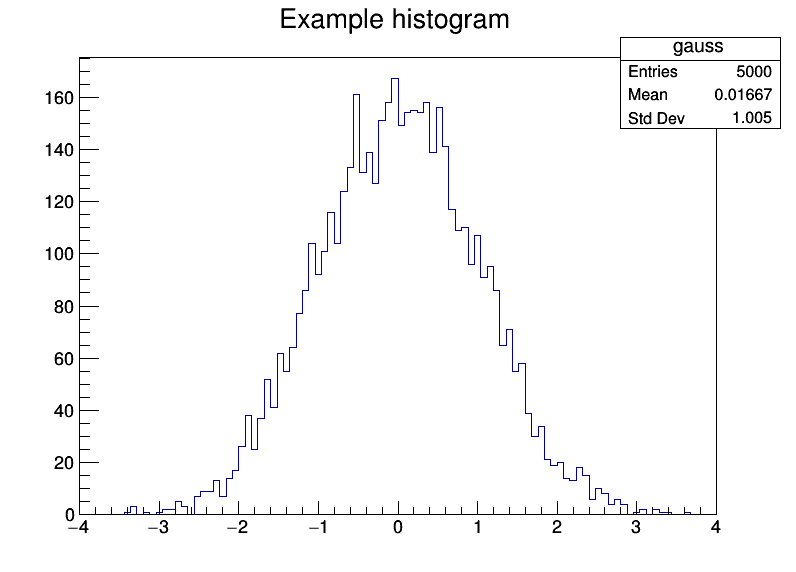

In [131]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [132]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root


--2020-03-09 18:45:26--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.28.138, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.5’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  14.7MB/s    in 28s     

2020-03-09 18:45:55 (14.9 MB/s) - ‘B2HHH_MagnetUp.root.5’ saved [444723234/444723234]



Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


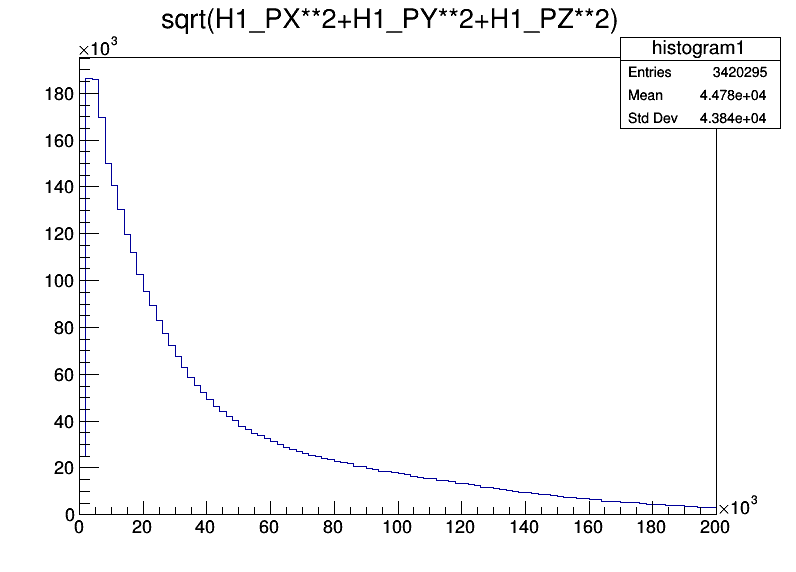

In [133]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)>>histogram1(100,0,200000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


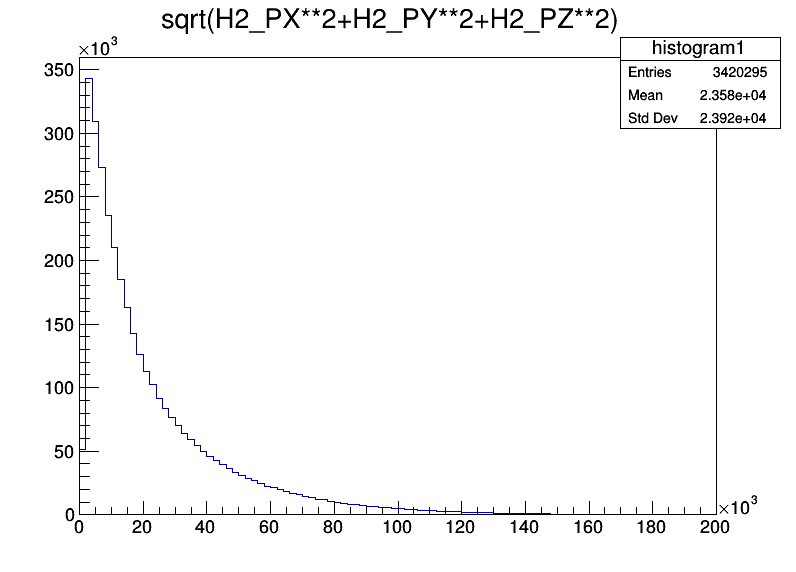

In [134]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H2_PX**2+H2_PY**2+H2_PZ**2)>>histogram1(100,0,200000)")
#tree.Draw("sqrt((H2_PX**2)+(H2_PY**2)+(H2_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


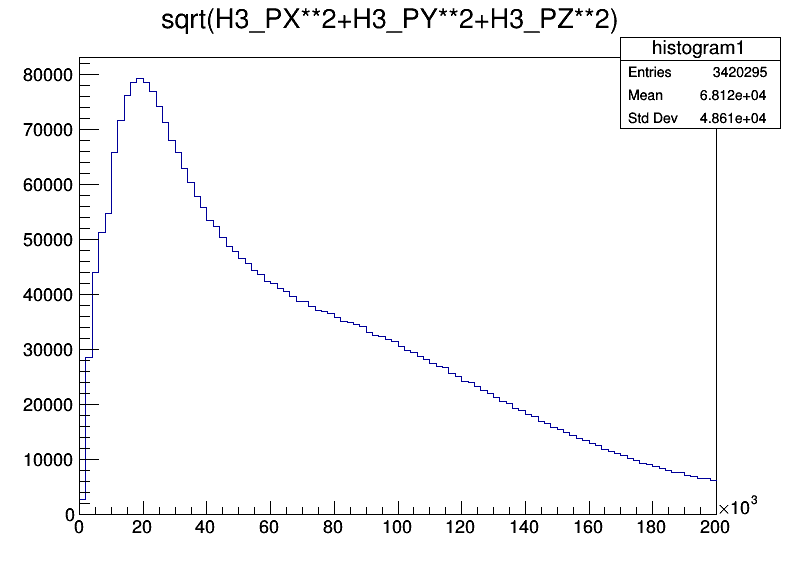

In [135]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)>>histogram1(100,0,200000)")
#tree.Draw("sqrt((H3_PX**2)+(H3_PY**2)+(H3_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

sqrt((((H1_PX)**2+(H1_PY)**2+(H1_PZ)**2)**(1/2)**2)+(493.677**2))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


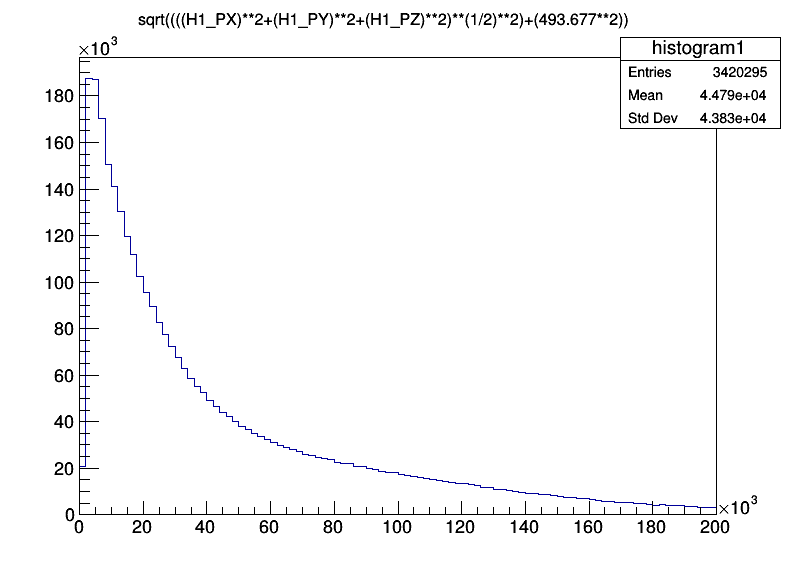

In [136]:
#We need to tell Python what the total energy is defined as mathematically - do that in this code block:


#mass of kaon+ is 493.677 MeV/C**2

import numpy as np

def p_tot_daughter(daughter):
  output ="(("+daughter+"_PX)**2+("+daughter+"_PY)**2+("+daughter+"_PZ)**2)**(1/2)"
  return output


def energy_daughter(x):
  p = p_tot_daughter(x)
  output = "sqrt(("+p+"**2)+(493.677**2))"
  return output

h1_etot = energy_daughter("H1")
print(h1_etot)



f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(h1_etot+">>histogram1(100,0,200000)")

histogram1 = ROOT.gDirectory.Get("histogram1")

c.Draw()


sqrt((((H2_PX)**2+(H2_PY)**2+(H2_PZ)**2)**(1/2)**2)+(493.677**2))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


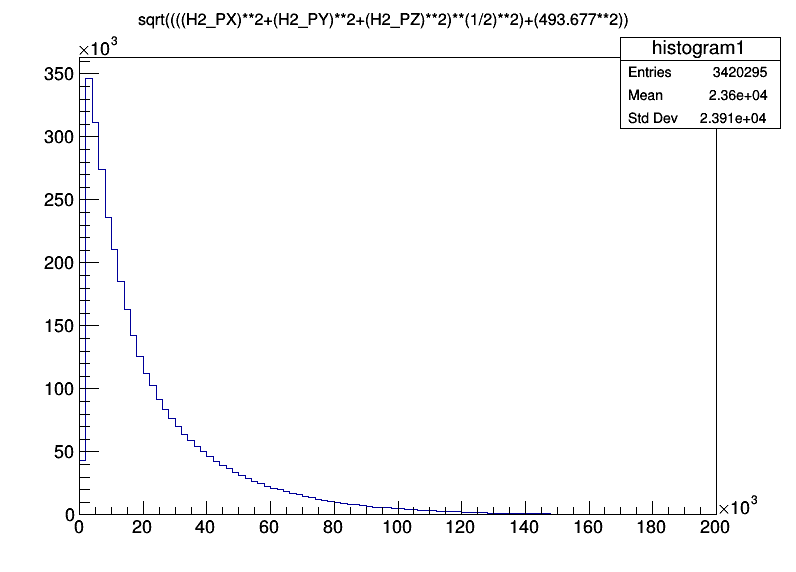

In [137]:
#Energy of H2


#mass of kaon+ is 493.677 MeV/C**2

import numpy as np

def p_tot_daughter(daughter):
  output ="(("+daughter+"_PX)**2+("+daughter+"_PY)**2+("+daughter+"_PZ)**2)**(1/2)"
  return output


def energy_daughter(x):
  p = p_tot_daughter(x)
  output = "sqrt(("+p+"**2)+(493.677**2))"
  return output

h2_etot = energy_daughter("H2")
print(h2_etot)



f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(h2_etot+">>histogram1(100,0,200000)")

histogram1 = ROOT.gDirectory.Get("histogram1")

c.Draw()


sqrt((((H3_PX)**2+(H3_PY)**2+(H3_PZ)**2)**(1/2)**2)+(493.677**2))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


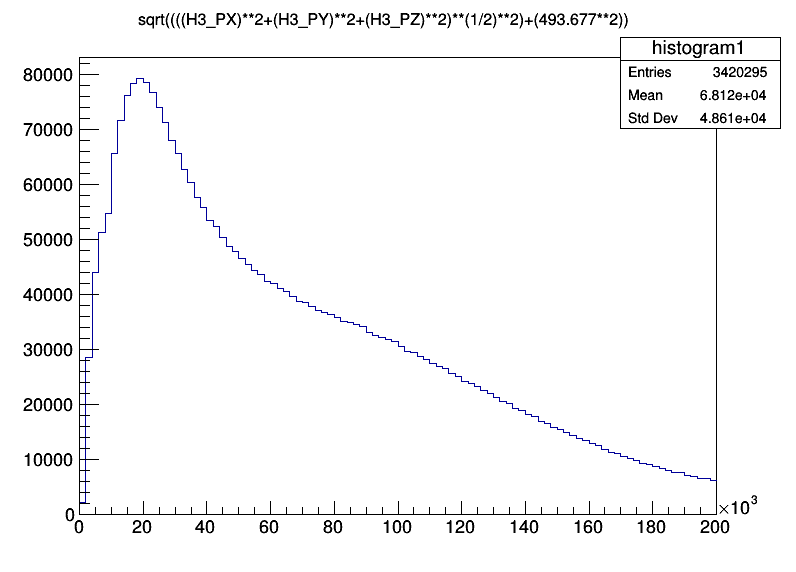

In [138]:
#Energy of H3

#kaon+ is 493.677 MeV/C**2

import numpy as np

def p_tot_daughter(daughter):
  output ="(("+daughter+"_PX)**2+("+daughter+"_PY)**2+("+daughter+"_PZ)**2)**(1/2)"
  return output


def energy_daughter(x):
  p = p_tot_daughter(x)
  output = "sqrt(("+p+"**2)+(493.677**2))"
  return output

h3_etot = energy_daughter("H3")
print(h3_etot)



f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(h3_etot+">>histogram1(100,0,200000)")

histogram1 = ROOT.gDirectory.Get("histogram1")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


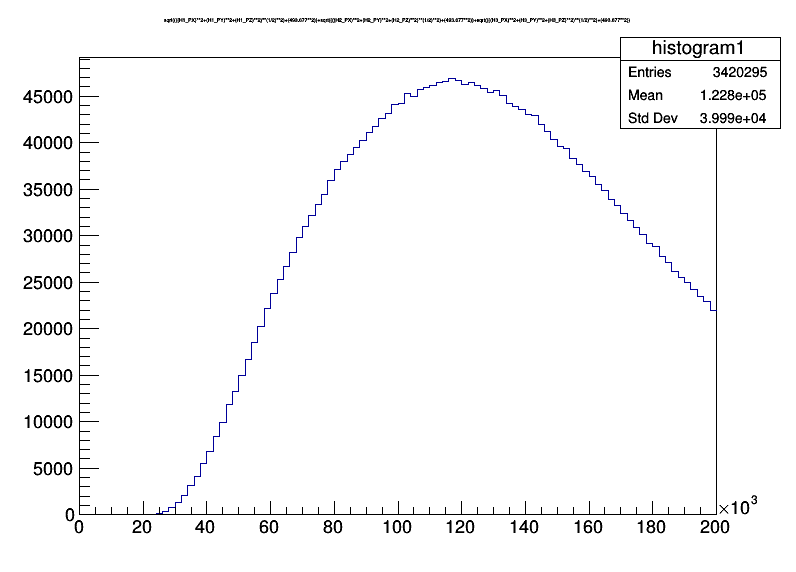

In [139]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total


bmeson_etot = h1_etot+"+"+h2_etot+"+"+h3_etot


f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(bmeson_etot+">>histogram1(100,0,200000)")

histogram1 = ROOT.gDirectory.Get("histogram1")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


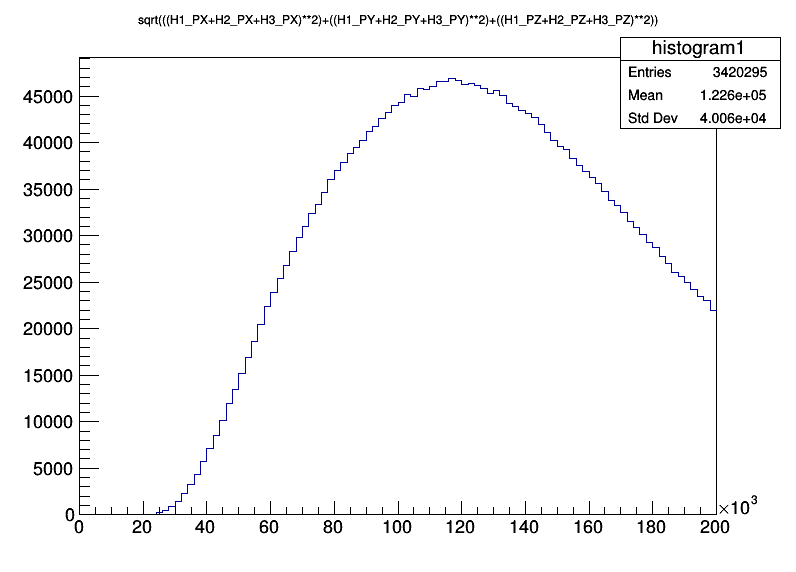

In [140]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

bmeson_px = "(H1_PX+H2_PX+H3_PX)"
bmeson_py = "(H1_PY+H2_PY+H3_PY)"
bmeson_pz = "(H1_PZ+H2_PZ+H3_PZ)"

bmeson_ptot = "sqrt(("+bmeson_px+"**2)+("+bmeson_py+"**2)+("+bmeson_pz+"**2))"



f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(bmeson_ptot+">>histogram1(100,0,200000)")

histogram1 = ROOT.gDirectory.Get("histogram1")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


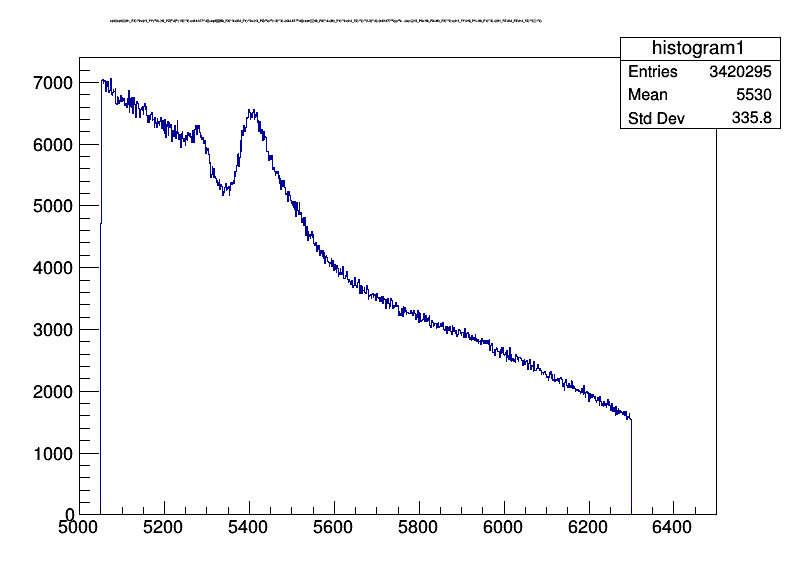

In [161]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)


bmeson_mass = "sqrt(("+bmeson_etot+")**2 - ("+bmeson_ptot+")**2)"


f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(bmeson_mass+">>histogram1(1000,5000,6500)")

histogram_mass = ROOT.gDirectory.Get("histogram1")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


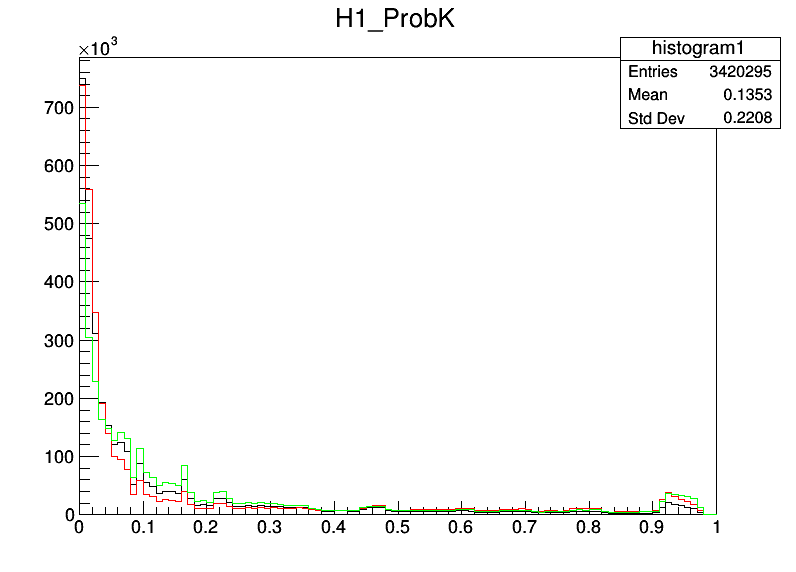

In [142]:
#Make plots of H1/H2/H3 _ProbK on one plot

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw("H1_ProbK"+">>histogram1(100,0,1)")
tree.Draw("H2_ProbK"+">>histogram2(100,0,1)")
tree.Draw("H3_ProbK"+">>histogram3(100,0,1)")

histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram3 = ROOT.gDirectory.Get("histogram3")

histogram1.SetLineColor(1)
histogram2.SetLineColor(2)
histogram3.SetLineColor(3)

histogram1.Draw()
histogram2.Draw("Same")
histogram3.Draw("Same")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


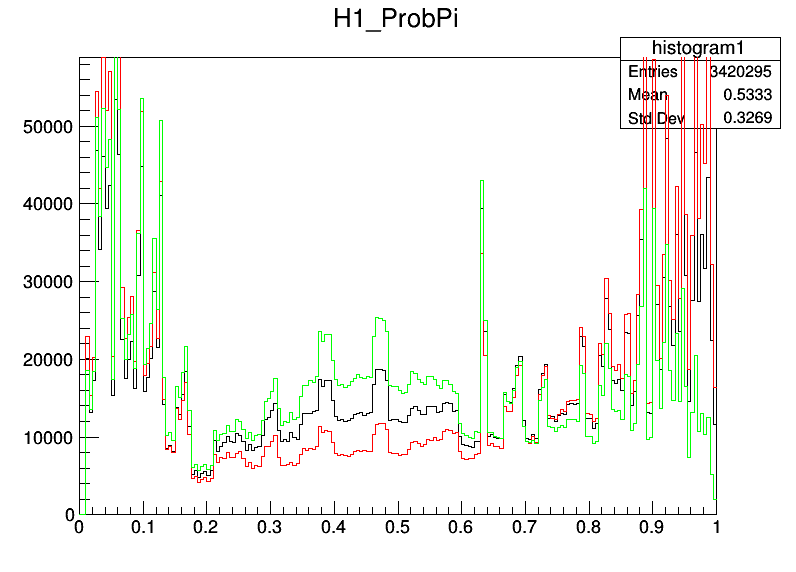

In [143]:
#Make plots of H1/H2/H3 _ProbPi on one plot

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw("H1_ProbPi"+">>histogram1(200,0,1)")
tree.Draw("H2_ProbPi"+">>histogram2(200,0,1)")
tree.Draw("H3_ProbPi"+">>histogram3(200,0,1)")

histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram3 = ROOT.gDirectory.Get("histogram3")

histogram1.SetLineColor(1)
histogram2.SetLineColor(2)
histogram3.SetLineColor(3)

histogram1.Draw()
histogram2.Draw("Same")
histogram3.Draw("Same")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


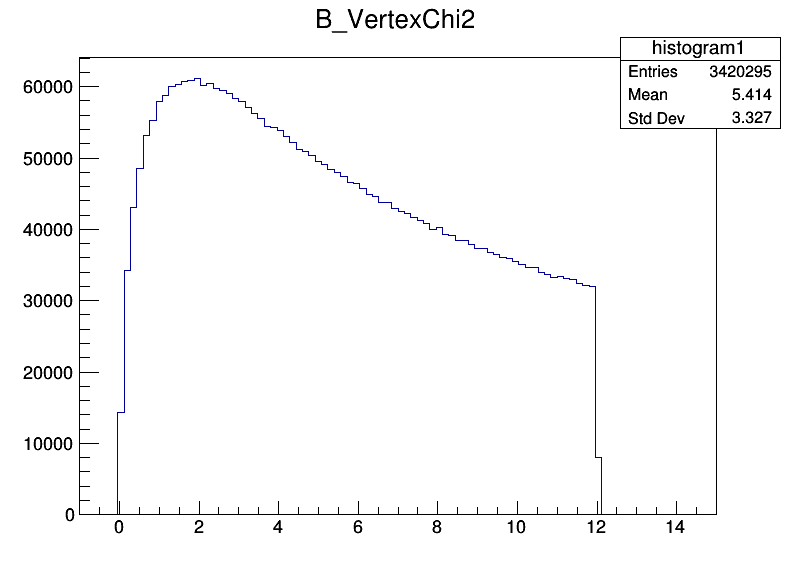

In [144]:
#For all our particles, make a plot of the B_VertexChi2


f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw("B_VertexChi2"+">>histogram1(100,-1,15)")

histogram1 = ROOT.gDirectory.Get("histogram1")

histogram1.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


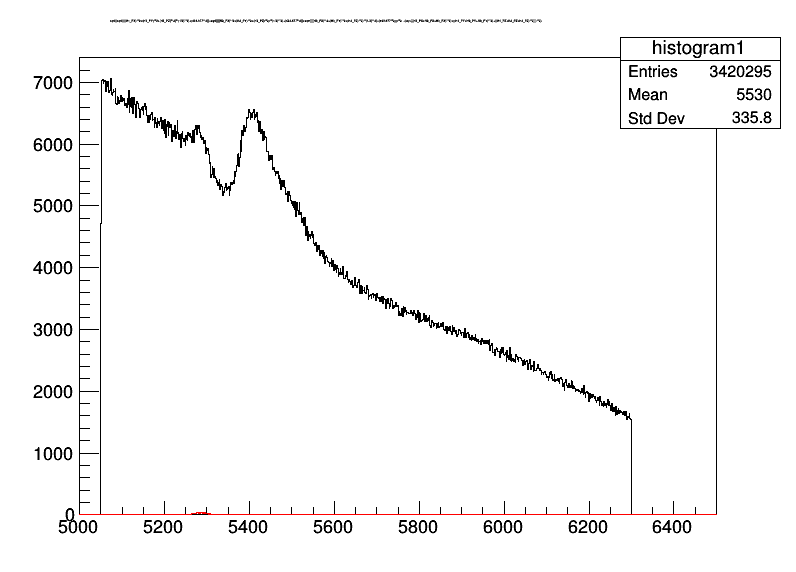

In [145]:
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

#This example is for each daughter particle to have a Probability of being a Kaon being more than 90% and to not be a muon
selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon&!H2_isMuon&!H3_isMuon")

#To apply the selection - we can use the copytree command:
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

CutTree=tree.CopyTree(selection)


#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

tree.Draw(bmeson_mass+">>histogram1(1000,5000,6500)")
CutTree.Draw(bmeson_mass+">>histogram2(1000,5000,6500)")

histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")

histogram1.SetLineColor(1)
histogram2.SetLineColor(2)

histogram1.Draw()
histogram2.Draw("Same")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


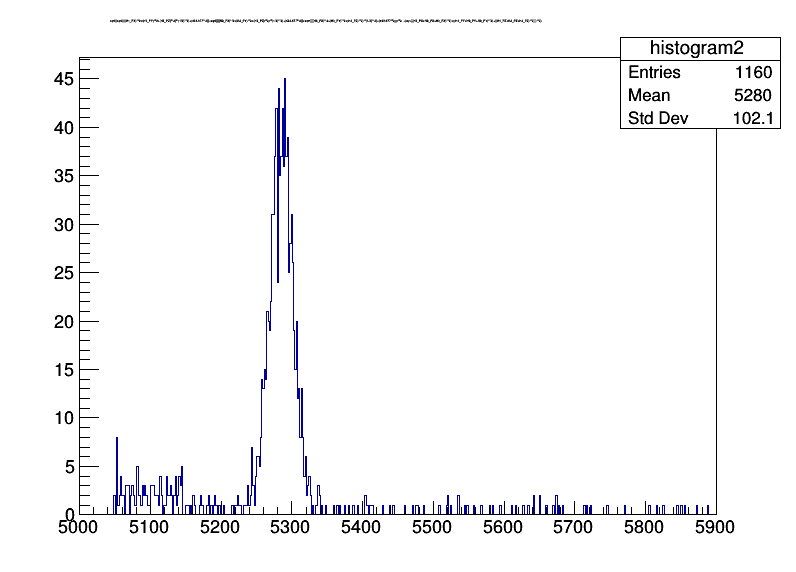

In [179]:
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#This draws only the selection graph:

CutTree.Draw(bmeson_mass+">>histogram2(500,5000,5900)")

histogram2 = ROOT.gDirectory.Get("histogram2")
histogram2.Draw()
c.Draw()

In [266]:
#Try the fitting tools at the end of part 2 - to estimate the events from the background.
#You might need to make a RooDataHist from your TH1F histogram (using RooDataHist ("Name","Title", RooArgList, Histogram1)
#and you can then fitTo() your RooDataHist.

#First we define our physical measurement we want to fit using the RooRealVar
mass= ROOT.RooRealVar(bmeson_mass, "Mass", 5000, 5500, "MeV/C^{2}")         

#The remainder of the variables we need to pass into our model. E.g. for a gaussian, we need a mean and a width parameter to vary
#For these RooRealVar's we add three numbers, a "starting value" and min/max values

gauss_mean=ROOT.RooRealVar("gauss_mean","Mean",5300,5250,5350)      
gauss_width=ROOT.RooRealVar("gauss_width","Width",3,0,60)            


#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gauss_mean,gauss_width)


#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)


#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.5, 0, 1)
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(sig_frac))

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
CutTree=tree.CopyTree(selection)

histogram = ROOT.TH1F("Gauss", "example histogram", 5,5000,5500)
tree.Draw(bmeson_mass+">>histogram(5,5000,5500)")
CutTree.Draw("bmeson_mass"+">>histogram(5,5000,5500)")


data_to_fit=ROOT.RooDataHist("bmeson_mass","Title", ROOT.RooArgList(mass), histogram)

#Then we can do the fitting:
model.fitTo(data_to_fit)


<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(bmeson_mass): fit range of variable sqrt((sqrt((((H1_PX)**2+(H1_PY)**2+(H1_PZ)**2)**(1/2)**2)+(493.677**2))+sqrt((((H2_PX)**2+(H2_PY)**2+(H2_PZ)**2)**(1/2)**2)+(493.677**2))+sqrt((((H3_PX)**2+(H3_PY)**2+(H3_PZ)**2)**(1/2)**2)+(493.677**2)))**2 - (sqrt(((H1_PX+H2_PX+H3_PX)**2)+((H1_PY+H2_PY+H3_PY)**2)+((H1_PZ+H2_PZ+H3_PZ)**2)))**2) expanded to nearest bin boundaries: [5000,5500] --> [5000,5500]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **  471 **SET PRINT           1
 **********
 **********
 **  472 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 exponent    -2.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+0

Error in <TTreeFormula::Compile>:  Bad numerical expression : "bmeson_mass"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {bmeson_mass,}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


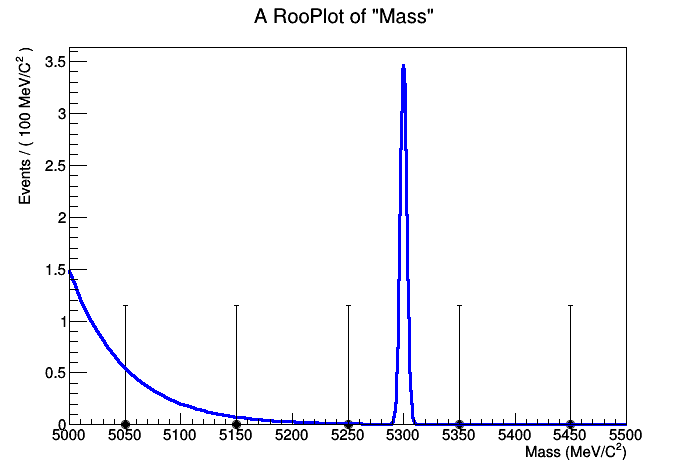

In [267]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()


In [259]:
import math

positive_selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon&!H2_isMuon&!H3_isMuon&((H1_Charge+H2_Charge+H3_Charge)==+1)")
positive_CutTree=tree.CopyTree(positive_selection)
positive_events = (positive_CutTree.GetEntries(positive_selection))

negative_selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon&!H2_isMuon&!H3_isMuon&((H1_Charge+H2_Charge+H3_Charge)==-1)")
negative_CutTree=tree.CopyTree(negative_selection)
negative_events = (negative_CutTree.GetEntries(negative_selection))


A = (float(negative_events - positive_events) / float(positive_events + negative_events))

sigma_A = math.sqrt((1-A**2)/float(positive_events + negative_events))

print "There are", positive_events, "matter events;"
print "There are", negative_events, "anti-matter events;"
print "The asymmetry is", A, "±", sigma_A, "."


There are 581 matter events;
There are 579 anti-matter events;
The asymmetry is -0.00172413793103 ± 0.0293609673357 .
